In [1]:
import numpy as np
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')
fn = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Background Info




 
 1) Features:
    - age: age of the patient 
    - anaemia: decrease of red blood cells or hemoglobin 
    - high blood pressure: if the patient has hypertension 
    - creatinine phosphokinase (CPK): level of the CPK enzyme in the blood 
    - diabetes: if the patient has diabetes (boolean)
    - ejection fraction: percentage of blood leaving the heart at each contraction  
    - platelets: platelets in the blood 
    - sex: woman or man 
    - serum creatinine: level of serum creatinine in the blood 
    - serum sodium: level of serum sodium in the blood 
    - smoking: if the patient smokes or not 
    - time: follow-up period 
    Response Variable:
    - death event: if the patient deceased during the follow-up period (boolean)
    

 2) 
     - age: continuous variable because it represents number of years
     - anaemia: categorical because it is a boolean value therefore it is either true or false
     - high blood pressure: categorical because it is a boolean value therefore it is either true or false
     - creatinine phosphokinase (CPK): continuous variable because it represents a measurement taken in mcg/L 
     - diabetes: categorical because it is a boolean value therefore it is either true or false
     - ejection fraction: continuous variable because it is a percentage.
     - platelets: continuous variable because it represents a measurement taken in kiloplatelets/mL
     - sex: categorical because it repesent there are two categories woman and man.
     - serum creatinine: continuous variable because it represents a measurement taken in mg/dL
     - serum sodium: continuous variable because it represents a measurement taken in mEq/L
     - smoking: categorical because it is a boolean value therefore it is either true or false
     - time: continuous variable because it represents number of days
     - death event: categorical because it is a boolean value therefore it is either true or false

It is important to determine whether certain factors could lead to someone dying. By implementing a model, we can determine which factors are the most important in helping to determine that prediction. Then with this information we can identify people in the future that are at a high risk earlier and help them improve by working on these significant factors.

In [3]:
fn.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


There are no missing values

In [5]:
fn.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There are no null values

In [7]:
print("unique values for each column")
print("")
for c in fn.columns:
    print(c)
    print(fn[c].nunique())
    print("")

unique values for each column

age
47

anaemia
2

creatinine_phosphokinase
208

diabetes
2

ejection_fraction
17

high_blood_pressure
2

platelets
176

serum_creatinine
40

serum_sodium
27

sex
2

smoking
2

time
148

DEATH_EVENT
2



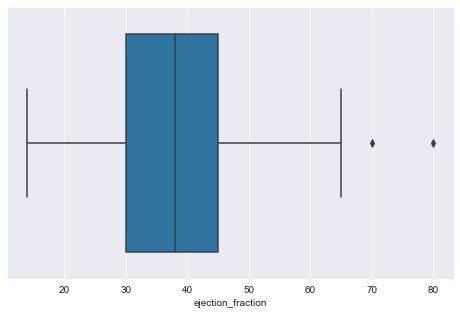

In [9]:
sns.boxplot(x = 'ejection_fraction', data = fn)

This plot shows that ejection fraction has a median of approximately 37 with the majority of the data being approximately between 30 and 45. Also there are 3 apparent outliers but there is no need to remove them because they can be actual observations in the data set thus, we must consider them.

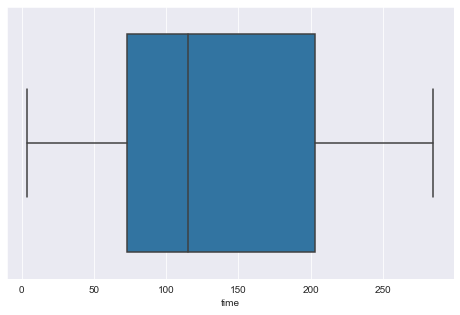

In [10]:
sns.boxplot(x = 'time', data = fn)

It is apparent that time has a mean of approximately 110 with the majority of data being approximately between 75 and 200. There are also no outliers in the data.

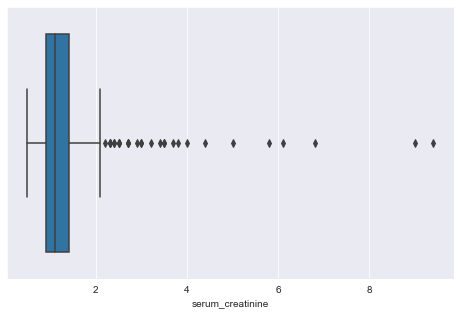

In [11]:
sns.boxplot(x = 'serum_creatinine', data = fn)

It is apparent that serum creatinine has a median of approximately 1 with 21 outliers.

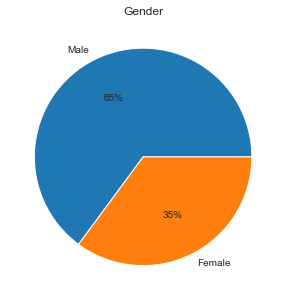

In [59]:
plt.pie(fn["sex"].value_counts(), labels = ["Male", "Female"],autopct='%1.0f%%')
plt.title("Gender")
plt.show()

The majority of people are male.

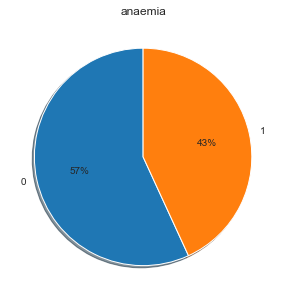

In [62]:
plt.pie(fn['anaemia'].value_counts(),labels = ["0", "1"],autopct='%1.0f%%',
        shadow=True, startangle=90)
plt.title("anaemia")
plt.show()

The majority of people in the data set did not experience a decrease of red blood cells or hemoglobin.

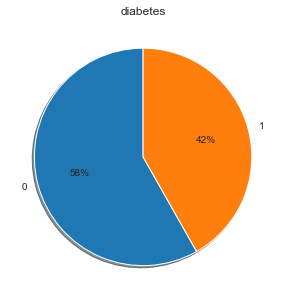

In [63]:
plt.pie(fn['diabetes'].value_counts(),labels = fn['diabetes'].value_counts().index ,autopct='%1.0f%%',
        shadow=True, startangle=90)
plt.title("diabetes")
plt.show()

The majority of people do not have diabetes.

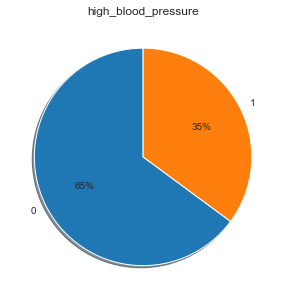

In [65]:
plt.pie(fn['high_blood_pressure'].value_counts(),labels = fn['high_blood_pressure'].value_counts().index ,autopct='%1.0f%%',
        shadow=True, startangle=90)
plt.title("high_blood_pressure")
plt.show()

The majority of people do not have hypertension.

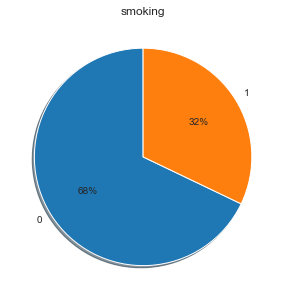

In [66]:
plt.pie(fn['smoking'].value_counts(),labels = fn['smoking'].value_counts().index ,autopct='%1.0f%%',
        shadow=True, startangle=90)
plt.title("smoking")
plt.show()

The majority of people are not smokers.

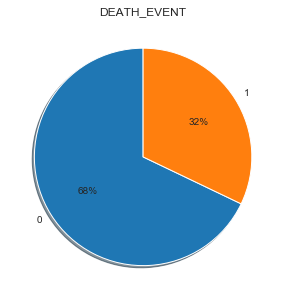

In [67]:
plt.pie(fn['DEATH_EVENT'].value_counts(),labels = fn['DEATH_EVENT'].value_counts().index ,autopct='%1.0f%%',
        shadow=True, startangle=90)
plt.title("DEATH_EVENT")
plt.show()

The majority of people have not pass away during the follow-up period.

([<matplotlib.patches.Wedge at 0x7f83a8e72ac8>,
 [Text(-0.7465747385746123, 0.8078528082034805, 'Female-Survived'),
  Text(-1.057635278562664, -0.3023369271850138, 'Female-Died'),
  Text(0.48024520506094204, -0.9896284873708789, 'Male-Survived'),
  Text(0.6669599840568219, 0.8747367487804111, 'Male-Died')],
 [Text(-0.40722258467706124, 0.44064698629280746, '24%'),
  Text(-0.5768919701250894, -0.1649110511918257, '11%'),
  Text(0.2619519300332411, -0.5397973567477521, '44%'),
  Text(0.36379635494008467, 0.477129135698406, '21%')])

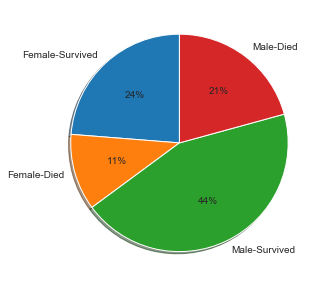

In [34]:
plt.pie(fn.groupby('sex')['DEATH_EVENT'].value_counts(),labels = ["Female-Survived", "Female-Died", "Male-Survived", "Male-Died"],autopct='%1.0f%%',
        shadow=True, startangle=90)

The majority of people are male and they have survived.

Working with a balanced data set is important when decideing a classification model because this can help increase the model's accuracy. A way of dealing with a imbalanced dataset is resampling the data set in order for each category to be balanced

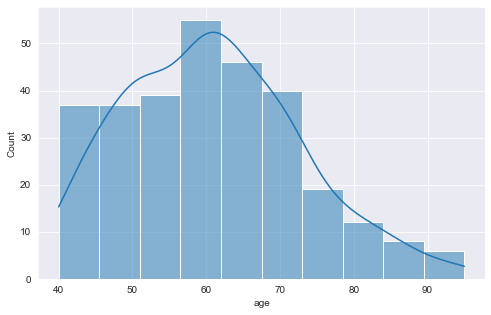

In [68]:
sns.histplot(data = fn, x = "age", kde = True)

This a unimodal distribution with the majority age being between 50-70.

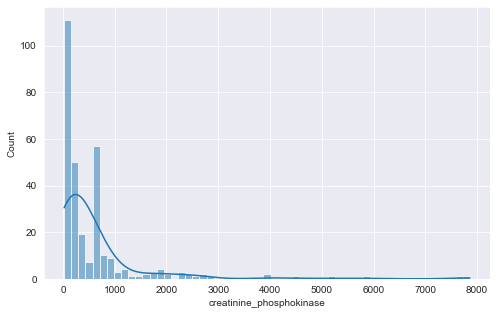

In [70]:
sns.histplot(data = fn, x = "creatinine_phosphokinase", kde = True)

This a unimodal distribution that is skewed to the right with the majority of creatinine phosphokinase falling
betweeen 0-1000

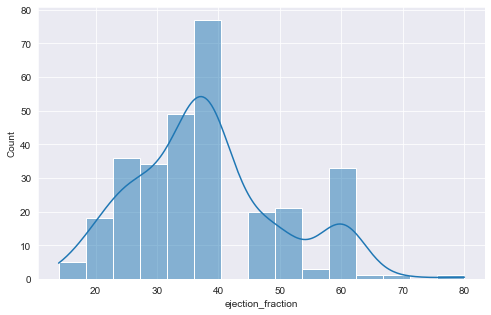

In [71]:
sns.histplot(data = fn, x = "ejection_fraction", kde = True)

It is apparent that the majority of ejection fraction is between 30-40

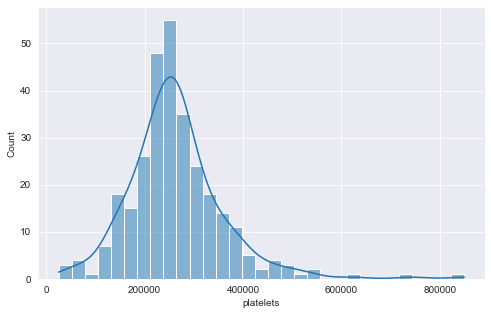

In [72]:
sns.histplot(data = fn, x = "platelets", kde = True)

This distribution looks approximately normal with the majority of the data being between 200000 and 400000

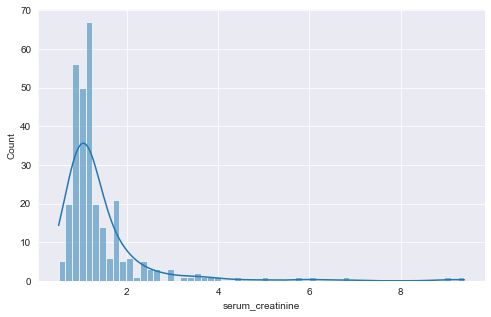

In [73]:
sns.histplot(data = fn, x = "serum_creatinine", kde = True)

This distribution is skewed to the right with the majority of data being below the value 2.

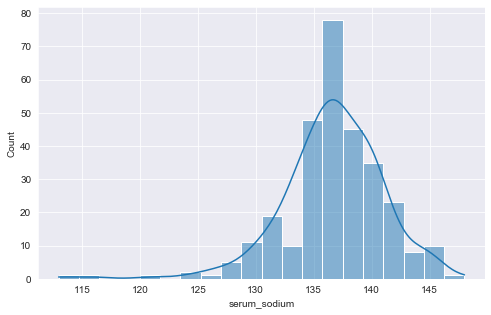

In [74]:
sns.histplot(data = fn, x = "serum_sodium", kde = True)

This distribution is skewed to the left with the majority of data being between 135 and 140.

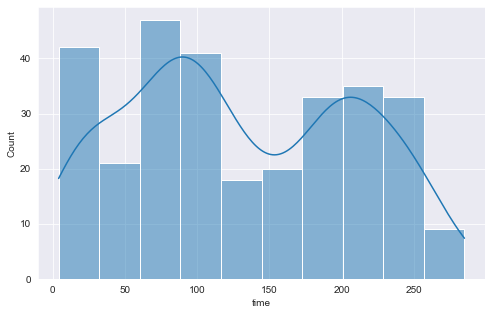

In [75]:
sns.histplot(data = fn, x = "time", kde = True)

This is a bimodal distribution with most of the data spread out.

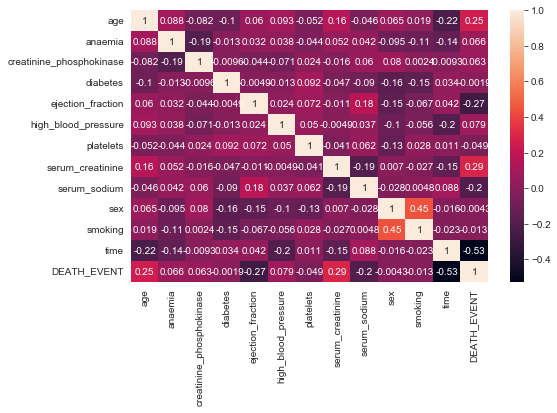

In [76]:
sns.heatmap(fn.corr(), annot = True)

The heatmap tells you if differnt attributes correlate with one another. 
Multicollinearity is when two or more predictors have a relationship independent of the response variable. We care about finding this in our model because if there is multicollinearity among the data then the created model will not be accurate. We can identify multicollinearity by using a correlation matrix (heatmap) thoughout the data set. Based on the heatmap above there is no strong multicollinearity among each of the attributes.

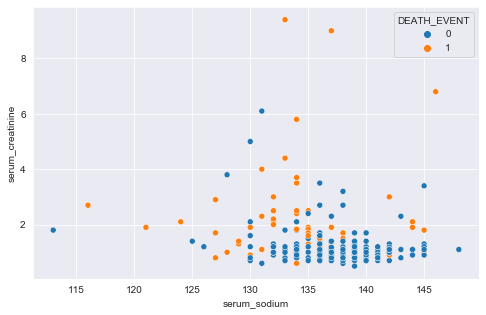

In [79]:
sns.scatterplot(data = fn,  x = "serum_sodium", y = "serum_creatinine", hue = "DEATH_EVENT")

It is apparent that the higher the serum_creatinine the more likely your chances of death are.

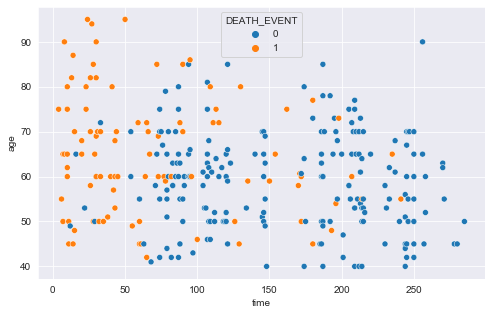

In [83]:
sns.scatterplot(data = fn,  x = "time", y = "age", hue = "DEATH_EVENT")

It is apparent that the lower the time and the higher the age can increase the chances of death.

Scaling

    1) It can be sometimes necessary to scale the data ecause the data may be in different range of values and using the same scale for all the columns may produce a better result since it may help the training of the model.
    
    2) I will be using standard scaler for this data set.
    
    3) In this stituation only the response variables will be scaled because the response vaibale is categorical.
    
Preprocessing

    1) In this data set none of the variables require dummy variables because all the categorical variable are already in a numerical format.
    
    2) Label encoding converts the categorical value into numerical value that can be used by the model. One hot encoding instead creates a column for each categorical value of the column to which it is applied, the new columns created will only have 0s and 1s. I will use one hot encoding for nomial categories and label encoding for ordinal categories.
    
     
     

In [89]:
continuous_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X = fn.drop(['DEATH_EVENT'], axis = 1)
Y = fn['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [98]:
scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

In [99]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
predictions = lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7777777777777778


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        53
           1       0.87      0.54      0.67        37

    accuracy                           0.78        90
   macro avg       0.81      0.74      0.75        90
weighted avg       0.80      0.78      0.76        90



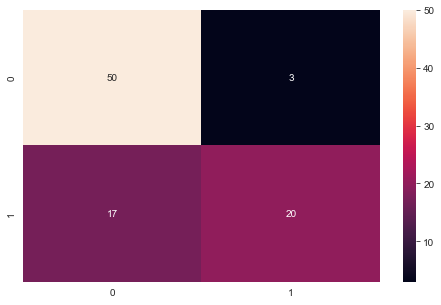

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)

In [104]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, Y, cv = 5)
print(scores.mean())

0.7472723904788368


In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.6888888888888889


In [107]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        53
           1       0.67      0.49      0.56        37

    accuracy                           0.69        90
   macro avg       0.68      0.66      0.66        90
weighted avg       0.69      0.69      0.68        90



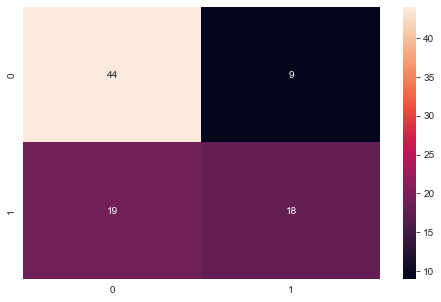

In [108]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)

In [109]:
scores = cross_val_score(dt, X, Y, cv = 5)
print(scores.mean())

0.6394794850421415


Based on the two models, it is apparent that logistic regression was the most accurate model. This was because logistic regression gave an accuracy score of .778 and a cross-validation score of .74. At the same time, the decision tree had an accuracy score of .689 with a cross-validation score of .639, which are both lower than the regression scores. But each model does show that we can predict mortality caused by heart failure at a decent level of accuracy. A way to expand or improve upon the model is to use different subsets of response variables to determine which variables are important for our cause so we can then make a more accurate model.